In [147]:
#Tianyi Bi, Jaibock Lee
%matplotlib inline
import collections
from __future__ import division
from IPython.display import display
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

### Problem 1

In [2]:
df1 = pd.read_csv("Lab2/DF1", header = 0, index_col = 0)

###### pandas

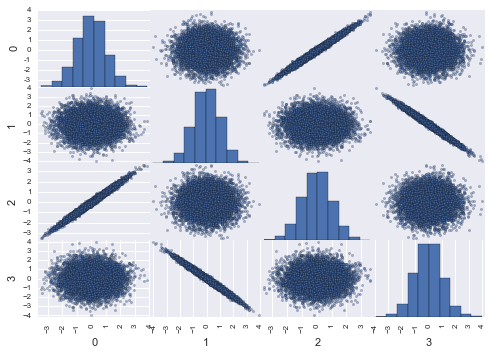

In [3]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df1)
sns.despine()

###### seaborn

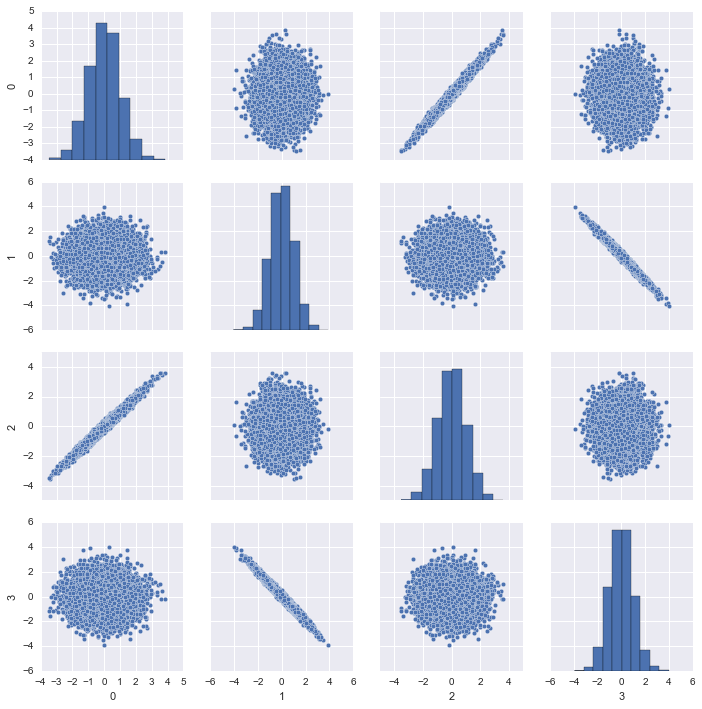

In [4]:
sns.pairplot(df1)

In [5]:
np.cov(df1)

array([[ 0.90590606, -0.18219351,  1.38000684, ..., -1.10234248,
         0.32833244,  0.87379896],
       [-0.18219351,  0.22027101, -0.71731923, ...,  0.86453462,
        -0.07054978, -0.1115653 ],
       [ 1.38000684, -0.71731923,  3.15550751, ..., -3.21668302,
         0.51138301,  1.17832303],
       ..., 
       [-1.10234248,  0.86453462, -3.21668302, ...,  3.67220519,
        -0.3998914 , -0.80375089],
       [ 0.32833244, -0.07054978,  0.51138301, ..., -0.3998914 ,
         0.12207671,  0.32181487],
       [ 0.87379896, -0.1115653 ,  1.17832303, ..., -0.80375089,
         0.32181487,  0.88037682]])

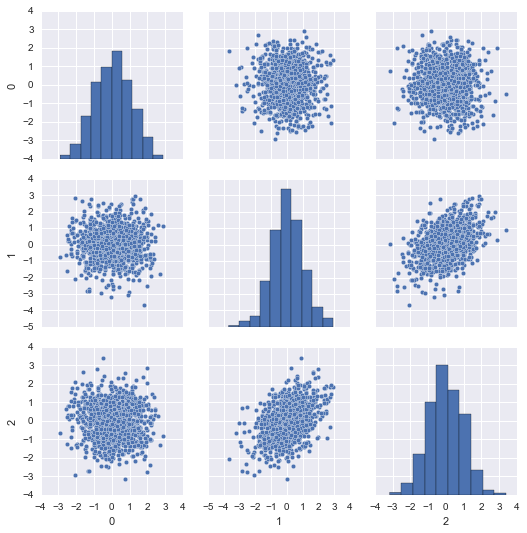

In [92]:
# random generated multivariate data
rv = np.random.multivariate_normal([0, 0, 0], [[1, 0, 0],[ 0, 1, 0.5],[0, 0.5, 1]], 1000)
rv_df = pd.DataFrame(rv)
sns.pairplot(rv_df)

### Problem 2

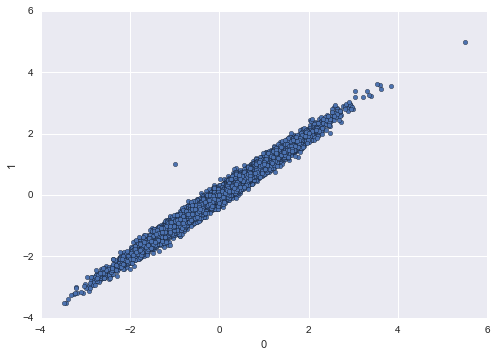

In [6]:
df2 = pd.read_csv("Lab2/DF2", header = 0, index_col = 0)
df2.plot(kind='scatter', x='0', y='1')

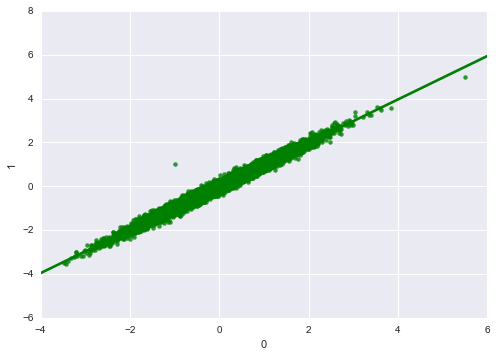

In [7]:
# according to the regression plot, the point(-1, 1) is more outlying than the other one
sns.regplot('0', '1', df2, color = 'g')
sns.despine()

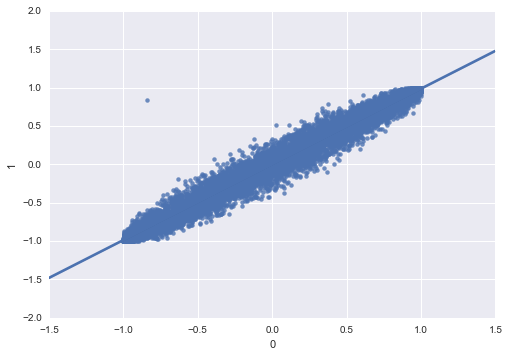

In [8]:
#applied sine to all the data point because all data, since it is a linear dataset
sin_df2 = df2.apply(np.sin)
sns.regplot('0','1',sin_df2)
sns.despine()

### Problem 3

In [47]:
# generating data and noise with mean of 0 and variance of 1
mu, sigma, n= 0, 1, 150
x = np.random.normal(mu, sigma, n)
noise = np.random.normal(mu, sigma, n)
y = -3 + noise
p3 = pd.DataFrame(np.array([x,y]).T)
p3.head()

0         1
0  1.224810 -3.997117
1 -1.088194 -3.260015
2  1.097869 -2.171505
3  0.417117 -3.228582
4  0.046435 -1.824650

In [49]:
# the coefficient and the intercept is close to the numbers given by the question
from sklearn import datasets, linear_model
lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1, 1), y)
print lr.coef_, lr.intercept_

[-0.035629] -3.02007228493


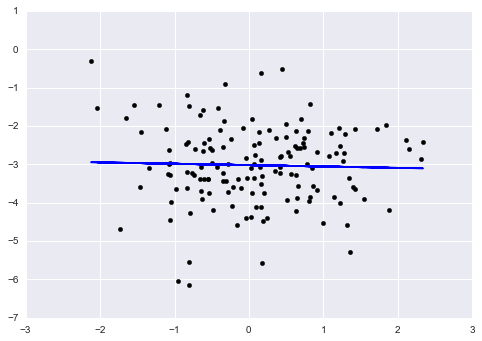

In [50]:
#the plot of the graph
plt.scatter(x.reshape(-1, 1), y, color = 'black')
plt.plot(x.reshape(-1, 1), lr.predict(x.reshape(-1, 1)), color = 'blue')

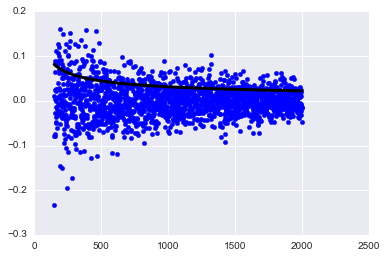

In [73]:
coef = []
for i in range (150, 2000):
    mu, sigma, n= 0, 1, i
    x = np.random.normal(mu, sigma, n)
    noise = np.random.normal(mu, sigma, n)
    y = -3 + noise
    p3b = pd.DataFrame(np.array([x,y]).T)
    
    lr.fit(x.reshape(-1, 1), y)
    coef.append(lr.coef_[0])

n = range(150, 2000)
n_sqrt = []
for i in n:
    n_sqrt.append(1/math.sqrt(i))
plt.scatter(n, coef, color = 'blue')
plt.plot(n, n_sqrt, color = 'black', linewidth = 3)

### Problem 4

In [9]:
#top kth highest name for year
def kTopFromYear(k, year):
    file_name = "yob" + str(year) + ".txt"
    names = pd.read_csv("Names/"+file_name, header = None)
    display(names.sort_values(by = 2,ascending = False)[:k])

In [10]:
kTopFromYear(10,1880)

0  1     2
942     John  M  9655
943  William  M  9531
0       Mary  F  7065
944    James  M  5927
945  Charles  M  5348
946   George  M  5126
947    Frank  M  3242
948   Joseph  M  2632
1       Anna  F  2604
949   Thomas  M  2534

In [11]:
#frequency of male and female for the same name
def genderFrequency(name):
    for year in range(1880, 2016):
        file_name = "yob" + str(year) + ".txt"
        names = pd.read_csv("Names/"+file_name, header = None)
        print("This is year " + str(year))
        display(names[names[0] == name].groupby(0)[[0,1,2]].head())

In [12]:
genderFrequency('Mary')

This is year 1880


0  1     2
0     Mary  F  7065
1273  Mary  M    27

This is year 1881


0  1     2
0     Mary  F  6919
1238  Mary  M    29

This is year 1882


0  1     2
0     Mary  F  8148
1341  Mary  M    30

This is year 1883


0  1     2
0     Mary  F  8012
1345  Mary  M    32

This is year 1884


0  1     2
0     Mary  F  9217
1464  Mary  M    36

This is year 1885


0  1     2
0     Mary  F  9128
1467  Mary  M    38

This is year 1886


0  1     2
0     Mary  F  9889
1586  Mary  M    32

This is year 1887


0  1     2
0     Mary  F  9888
1542  Mary  M    47

This is year 1888


0  1      2
0     Mary  F  11754
1721  Mary  M     50

This is year 1889


0  1      2
0     Mary  F  11648
1740  Mary  M     41

This is year 1890


0  1      2
0     Mary  F  12078
1826  Mary  M     35

This is year 1891


0  1      2
0     Mary  F  11703
1791  Mary  M     39

This is year 1892


0  1      2
0     Mary  F  13172
1911  Mary  M     50

This is year 1893


0  1      2
0     Mary  F  12784
1883  Mary  M     55

This is year 1894


0  1      2
0     Mary  F  13151
1952  Mary  M     48

This is year 1895


0  1      2
0     Mary  F  13446
2068  Mary  M     47

This is year 1896


0  1      2
0     Mary  F  13811
2066  Mary  M     57

This is year 1897


0  1      2
0     Mary  F  13413
2009  Mary  M     63

This is year 1898


0  1      2
0     Mary  F  14406
2225  Mary  M     50

This is year 1899


0  1      2
0     Mary  F  13172
2077  Mary  M     50

This is year 1900


0  1      2
0     Mary  F  16707
2457  Mary  M     75

This is year 1901


0  1      2
0     Mary  F  13136
2173  Mary  M     58

This is year 1902


0  1      2
0     Mary  F  14486
2290  Mary  M     56

This is year 1903


0  1      2
0     Mary  F  14275
2312  Mary  M     63

This is year 1904


0  1      2
0     Mary  F  14962
2417  Mary  M     58

This is year 1905


0  1      2
0     Mary  F  16067
2472  Mary  M     68

This is year 1906


0  1      2
0     Mary  F  16370
2444  Mary  M     76

This is year 1907


0  1      2
0     Mary  F  17580
2650  Mary  M     70

This is year 1908


0  1      2
0     Mary  F  18666
2669  Mary  M     79

This is year 1909


0  1      2
0     Mary  F  19259
2795  Mary  M     80

This is year 1910


0  1      2
0     Mary  F  22848
3027  Mary  M     99

This is year 1911


0  1      2
0     Mary  F  24390
3129  Mary  M     98

This is year 1912


0  1      2
0     Mary  F  32303
3794  Mary  M    118

This is year 1913


0  1      2
0     Mary  F  36641
4081  Mary  M    126

This is year 1914


0  1      2
0     Mary  F  45345
4629  Mary  M    127

This is year 1915


0  1      2
0     Mary  F  58187
5397  Mary  M    159

This is year 1916


0  1      2
0     Mary  F  61437
5598  Mary  M    164

This is year 1917


0  1      2
0     Mary  F  64281
5760  Mary  M    159

This is year 1918


0  1      2
0     Mary  F  67368
6043  Mary  M    169

This is year 1919


0  1      2
0     Mary  F  65843
6040  Mary  M    155

This is year 1920


0  1      2
0     Mary  F  70975
6195  Mary  M    195

This is year 1921


0  1      2
0     Mary  F  73983
6320  Mary  M    187

This is year 1922


0  1      2
0     Mary  F  72170
6238  Mary  M    186

This is year 1923


0  1      2
0     Mary  F  71633
6163  Mary  M    203

This is year 1924


0  1      2
0     Mary  F  73532
6310  Mary  M    224

This is year 1925


0  1      2
0     Mary  F  70602
6140  Mary  M    260

This is year 1926


0  1      2
0     Mary  F  67827
5973  Mary  M    272

This is year 1927


0  1      2
0     Mary  F  70638
5946  Mary  M    283

This is year 1928


0  1      2
0     Mary  F  66862
5765  Mary  M    294

This is year 1929


0  1      2
0     Mary  F  63514
5578  Mary  M    327

This is year 1930


0  1      2
0     Mary  F  64137
5556  Mary  M    340

This is year 1931


0  1      2
0     Mary  F  60294
5281  Mary  M    325

This is year 1932


0  1      2
0     Mary  F  59869
5404  Mary  M    330

This is year 1933


0  1      2
0     Mary  F  55493
5155  Mary  M    316

This is year 1934


0  1      2
0     Mary  F  56921
5285  Mary  M    303

This is year 1935


0  1      2
0     Mary  F  55072
5219  Mary  M    276

This is year 1936


0  1      2
0     Mary  F  54362
5167  Mary  M    293

This is year 1937


0  1      2
0     Mary  F  55642
5246  Mary  M    288

This is year 1938


0  1      2
0     Mary  F  56215
5325  Mary  M    284

This is year 1939


0  1      2
0     Mary  F  54901
5292  Mary  M    272

This is year 1940


0  1      2
0     Mary  F  56196
5351  Mary  M    303

This is year 1941


0  1      2
0     Mary  F  58035
5414  Mary  M    315

This is year 1942


0  1      2
0     Mary  F  63241
5742  Mary  M    276

This is year 1943


0  1      2
0     Mary  F  66172
5749  Mary  M    254

This is year 1944


0  1      2
0     Mary  F  62463
5621  Mary  M    252

This is year 1945


0  1      2
0     Mary  F  59287
5668  Mary  M    198

This is year 1946


0  1      2
0     Mary  F  67464
6155  Mary  M    186

This is year 1947


0  1      2
1     Mary  F  71685
6598  Mary  M    184

This is year 1948


0  1      2
1     Mary  F  68592
6552  Mary  M    164

This is year 1949


0  1      2
1     Mary  F  66864
6572  Mary  M    170

This is year 1950


0  1      2
1     Mary  F  65485
6746  Mary  M    119

This is year 1951


0  1      2
1     Mary  F  65693
6748  Mary  M    161

This is year 1952


0  1      2
1     Mary  F  65660
6946  Mary  M    158

This is year 1953


0  1      2
0     Mary  F  64368
7091  Mary  M    146

This is year 1954


0  1      2
0     Mary  F  67987
7177  Mary  M    168

This is year 1955


0  1      2
0     Mary  F  63167
7333  Mary  M    149

This is year 1956


0  1      2
0     Mary  F  61753
7522  Mary  M    143

This is year 1957


0  1      2
0     Mary  F  61095
7582  Mary  M    184

This is year 1958


0  1      2
0     Mary  F  55850
7671  Mary  M    141

This is year 1959


0  1      2
0     Mary  F  54474
7792  Mary  M    170

This is year 1960


0  1      2
0     Mary  F  51477
7937  Mary  M    169

This is year 1961


0  1      2
0     Mary  F  47669
8140  Mary  M    167

This is year 1962


0  1      2
1     Mary  F  43493
8196  Mary  M    158

This is year 1963


0  1      2
1     Mary  F  41551
8330  Mary  M    136

This is year 1964


0  1      2
1     Mary  F  40985
8467  Mary  M    134

This is year 1965


0  1      2
1     Mary  F  34274
8175  Mary  M    136

This is year 1966


0  1      2
2     Mary  F  28886
8329  Mary  M    108

This is year 1967


0  1      2
3     Mary  F  25317
8513  Mary  M    127

This is year 1968


0  1      2
5     Mary  F  21720
8936  Mary  M    101

This is year 1969


0  1      2
7     Mary  F  19851
9459  Mary  M    108

This is year 1970


0  1      2
8      Mary  F  19204
10163  Mary  M     99

This is year 1971


0  1      2
8      Mary  F  16698
10512  Mary  M     86

This is year 1972


0  1      2
12     Mary  F  13761
10594  Mary  M     74

This is year 1973


0  1      2
13     Mary  F  12320
10917  Mary  M     54

This is year 1974


0  1      2
12     Mary  F  11745
11296  Mary  M     61

This is year 1975


0  1      2
18     Mary  F  10966
11620  Mary  M     66

This is year 1976


0  1      2
21     Mary  F  10323
11965  Mary  M     62

This is year 1977


0  1      2
20     Mary  F  10661
12553  Mary  M     52

This is year 1978


0  1      2
23     Mary  F  10046
12594  Mary  M     61

This is year 1979


0  1      2
23     Mary  F  10555
13072  Mary  M     65

This is year 1980


0  1      2
25     Mary  F  11475
13457  Mary  M     52

This is year 1981


0  1      2
26     Mary  F  11041
13303  Mary  M     67

This is year 1982


0  1      2
29     Mary  F  10852
13389  Mary  M     73

This is year 1983


0  1     2
31     Mary  F  9895
13272  Mary  M    57

This is year 1984


0  1     2
32     Mary  F  9290
13399  Mary  M    56

This is year 1985


0  1     2
34     Mary  F  9240
13638  Mary  M    67

This is year 1986


0  1     2
36     Mary  F  8505
14284  Mary  M    47

This is year 1987


0  1     2
36     Mary  F  8394
14408  Mary  M    69

This is year 1988


0  1     2
33     Mary  F  8508
15415  Mary  M    48

This is year 1989


0  1     2
37     Mary  F  8642
15805  Mary  M    74

This is year 1990


0  1     2
34     Mary  F  8665
17002  Mary  M    45

This is year 1991


0  1     2
37     Mary  F  8757
17731  Mary  M    32

This is year 1992


0  1     2
35     Mary  F  8454
18397  Mary  M    25

This is year 1993


0  1     2
36     Mary  F  8115
19387  Mary  M    18

This is year 1994


0  1     2
36     Mary  F  7750
21494  Mary  M    10

This is year 1995


0  1     2
39     Mary  F  7438
20456  Mary  M    13

This is year 1996


0  1     2
43     Mary  F  6946
20203  Mary  M    15

This is year 1997


0  1     2
45     Mary  F  6631
21009  Mary  M    13

This is year 1998


0  1     2
44     Mary  F  6434
21391  Mary  M    14

This is year 1999


0  1     2
44     Mary  F  6360
22842  Mary  M    11

This is year 2000


0  1     2
45     Mary  F  6184
24298  Mary  M    10

This is year 2001


0  1     2
48     Mary  F  5725
23525  Mary  M    13

This is year 2002


0  1     2
50     Mary  F  5455
24021  Mary  M    12

This is year 2003


0  1     2
58     Mary  F  5010
26043  Mary  M     9

This is year 2004


0  1     2
61     Mary  F  4805
22010  Mary  M    31

This is year 2005


0  1     2
71     Mary  F  4451
26645  Mary  M    10

This is year 2006


0  1     2
79     Mary  F  4086
27844  Mary  M    10

This is year 2007


0  1     2
92     Mary  F  3674
28517  Mary  M    10

This is year 2008


0  1     2
95  Mary  F  3493

This is year 2009


0  1     2
101  Mary  F  3155

This is year 2010


0  1     2
108  Mary  F  2863

This is year 2011


0  1     2
111  Mary  F  2704

This is year 2012


0  1     2
120    Mary  F  2566
31192  Mary  M     6

This is year 2013


0  1     2
119  Mary  F  2639

This is year 2014


0  1     2
119    Mary  F  2624
32438  Mary  M     5

This is year 2015


0  1     2
123  Mary  F  2602

In [13]:
#frequency of male and female for the same name
def relativeFrequency(name):
    for year in range(1880, 2016):
        file_name = "yob" + str(year) + ".txt"
        names = pd.read_csv("Names/"+file_name, header = None)
        current_year = names[names[0] == name][2].sum()
        total = names[2].sum()
        print(str(current_year/total * 100) + '% of people named ' + name + ' in year ' + str(year))

In [14]:
relativeFrequency('Mary')

3.51991741198% of people named Mary in year 1880
3.60567941213% of people named Mary in year 1881
3.6915326767% of people named Mary in year 1882
3.70785222061% of people named Mary in year 1883
3.80057750048% of people named Mary in year 1884
3.80562498443% of people named Mary in year 1885
3.88572726667% of people named Mary in year 1886
4.01582887355% of people named Mary in year 1887
3.941577566% of people named Mary in year 1888
4.04536456387% of people named Mary in year 1889
4.01889841109% of people named Mary in year 1890
4.09592744397% of people named Mary in year 1891
3.95421933925% of people named Mary in year 1892
3.94776491135% of people named Mary in year 1893
3.897051008% of people named Mary in year 1894
3.84389671362% of people named Mary in year 1895
3.8793127563% of people named Mary in year 1896
3.88404360182% of people named Mary in year 1897
3.78964035642% of people named Mary in year 1898
3.89759311392% of people named Mary in year 1899
3.72674945371% of people n

In [169]:
# all names that shifted popularity amoung genders
def genderShiftNames():
    file_name = "yob" + str(1880) + ".txt"
    names = names = pd.read_csv("Names/"+file_name, header = None)
    total = names[2].sum()
    names[3] = names[2].apply(lambda x: (x/total)*100)
    dict1 = {}
    for i in range(len(names[0])):
        if names[0][i] in dict1:
            if dict1.get(names[0][i])[1] < names[3][i]:
                dict1[names[0][i]] = [names[1][i], names[3][i]]
        else:
            dict1[names[0][i]] = [names[1][i], names[3][i]]
    
    names_shift_gender = []
    for i in range(1881, 2016):
        file_name = "yob" + str(i) + ".txt"
        names = names = pd.read_csv("Names/"+file_name, header = None)
        total = names[2].sum()
        names[3] = names[2].apply(lambda x: (x/total)*100)
        for i in range(len(names[0])):
            if names[0][i] in dict1:
                if dict1.get(names[0][i])[1] < names[3][i] and dict1.get(names[0][i])[0] != names[1][i]:
                    dict1[names[0][i]] = [names[1][i], names[3][i]]
                    names_shift_gender.append(names[0][i])
            else:
                dict1[names[0][i]] = [names[1][i], names[3][i]]
    
    print names_shift_gender

In [170]:
genderShiftNames()

['Johnnie', 'Fay', 'Lonie', 'Johnnie', 'Byrd', 'Ocie', 'Guadalupe', 'Ocie', 'Odie', 'Theo', 'Jodie', 'Theo', 'Odie', 'Gail', 'Sammie', 'Tommie', 'Shirley', 'Odie', 'Byrd', 'Gail', 'Orrie', 'Jimmie', 'Theo', 'Guadalupe', 'Garnet', 'Love', 'Nova', 'Tracy', 'Golden', 'Joy', 'Santos', 'Love', 'Kay', 'Arley', 'Jodie', 'Earlie', 'Marion', 'Arlie', 'Jimmie', 'Tommie', 'Fay', 'Tracy', 'Love', 'Laurie', 'Fay', 'Ossie', 'Gay', 'Laurie', 'Hollie', 'Ura', 'Onnie', 'Orra', 'Christy', 'Gene', 'Sammie', 'Arlie', 'Merle', 'Garnett', 'Elgie', 'Unknown', 'Perle', 'Sammie', 'Courtney', 'Hollie', 'Carlie', 'Jimmie', 'Gene', 'Shellie', 'Neely', 'Shellie', 'Unknown', 'Murl', 'Freddie', 'Refugio', 'Jewel', 'Cecil', 'Jewel', 'Billie', 'Lacy', 'Cecil', 'Gail', 'Shelley', 'Johnnie', 'Gail', 'Murl', 'Loney', 'Johnnie', 'Freddie', 'Lacy', 'Jonnie', 'Mearl', 'Lorenza', 'Dale', 'Rene', 'Carlie', 'Doll', 'Jimmie', 'Dale', 'Freddie', 'Jonnie', 'Jewell', 'Saint', 'Offie', 'Jewell', 'Dewey', 'Lavern', 'Dewey', 'Freddie

In [160]:
names.groupby([0,1]).sum()

2         3
0         1               
Aaron     M  102  0.050625
Ab        M    5  0.002482
Abbie     F   71  0.035239
Abbott    M    5  0.002482
Abby      F    6  0.002978
Abe       M   50  0.024816
Abel      M    9  0.004467
Abigail   F   12  0.005956
Abner     M   27  0.013401
Abraham   M   81  0.040202
Abram     M   21  0.010423
Ada       F  652  0.323602
Adah      F   24  0.011912
Adaline   F   23  0.011415
Adam      M  104  0.051618
Adda      F   14  0.006949
Addie     F  274  0.135992
          M    8  0.003971
Addison   M   19  0.009430
Adela     F    9  0.004467
Adelaide  F   65  0.032261
Adelbert  M   28  0.013897
Adele     F   41  0.020349
Adelia    F   18  0.008934
Adeline   F   54  0.026801
Adella    F   26  0.012904
Adelle    F    5  0.002482
Aden      M    7  0.003474
Adina     F    5  0.002482
Adline    F    8  0.003971
...          ...       ...
Wong      M   10  0.004963
Wood      M    5  0.002482
Woodie    M    5  0.002482
Woodson   M    8  0.003971
Worth     M    8  0.003971
Worthy    M    5  0.002482
Wright    M    5  0.002482
Wyatt     M   15  0.007445
Wylie     M   12  0.005956
Yee       M    6  0.002978
Yetta     F    7  0.003474
York      M    5  0.002482
Young     M   14  0.006949
Zachariah M    5  0.002482
Zack      M   19  0.009430
Zada      F   13  0.006452
Zeb       M   10  0.004963
Zeke      M    6  0.002978
Zelda     F    6  0.002978
Zella     F   31  0.015386
Zelma     F   19  0.009430
Zena      F    7  0.003474
Zetta     F    8  0.003971
Zilpha    F    6  0.002978
Zoa       F    8  0.003971
Zoe       F   23  0.011415
Zola      F    7  0.003474
Zona      F    8  0.003971
Zora      F   28  0.013897
Zula      F   27  0.013401

[2000 rows x 2 columns]

In [159]:
file_name = "yob" + str(1881) + ".txt"
names1881 = pd.read_csv("Names/"+file_name, header = None)
total = names1881[2].sum()
names1881[3] = names1881[2].apply(lambda x: (x/total)*100)
odict1.get(names1881[0][0])

['M', 27, 0.013400700807019982]

### Problem 5

In [16]:
tweets = pd.read_csv("tweets.csv", header = 0)
tweets.head()

id              id_str    user_location user_bg_color  retweet_count  \
0   1  729828033092149248      Wheeling WV        022330              0   
1   2  729828033092161537              NaN        C0DEED              0   
2   3  729828033566224384              NaN        C0DEED              0   
3   4  729828033893302272           global        C0DEED              0   
4   5  729828034178482177  California, USA        131516              0   

       user_name  polarity              created  geo  \
0     Jaybo26003      0.00  2016-05-10T00:18:57  NaN   
1  brittttany_ns      0.15  2016-05-10T00:18:57  NaN   
2   JeffriesLori      0.00  2016-05-10T00:18:57  NaN   
3    WhorunsGOVs      0.00  2016-05-10T00:18:57  NaN   
4       BJCG0830      0.00  2016-05-10T00:18:57  NaN   

                                    user_description         user_created  \
0                                                NaN  2011-11-17T02:45:42   
1                                        18 // PSJAN  2012-12-24T17:33:12   
2                                                NaN  2012-10-11T14:29:59   
3    Get Latest Global Political news as they unfold  2014-02-16T07:34:24   
4  Queer Latino invoking his 1st amendment privil...  2009-03-21T01:43:26   

   user_followers coordinates  subjectivity  \
0              39         NaN           0.0   
1            1175         NaN           0.1   
2              42         NaN           0.0   
3             290         NaN           0.0   
4             354         NaN           0.0   

                                                text  
0  Make a difference vote! WV Bernie Sanders Coul...  
1  RT @HlPHOPNEWS: T.I. says if Donald Trump wins...  
2  You have no one to blame but yourselves if Tru...  
3  'Ruin the rest of their lives': Donald Trump c...  
4  RT @elianayjohnson: Per source, GOP megadonor ...

In [17]:
def getCandidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

In [18]:
tweets["candidate"] = tweets.apply(getCandidate, axis = 1)
tweets.head(2)

id              id_str user_location user_bg_color  retweet_count  \
0   1  729828033092149248   Wheeling WV        022330              0   
1   2  729828033092161537           NaN        C0DEED              0   

       user_name  polarity              created  geo user_description  \
0     Jaybo26003      0.00  2016-05-10T00:18:57  NaN              NaN   
1  brittttany_ns      0.15  2016-05-10T00:18:57  NaN      18 // PSJAN   

          user_created  user_followers coordinates  subjectivity  \
0  2011-11-17T02:45:42              39         NaN           0.0   
1  2012-12-24T17:33:12            1175         NaN           0.1   

                                                text        candidate  
0  Make a difference vote! WV Bernie Sanders Coul...  clinton,sanders  
1  RT @HlPHOPNEWS: T.I. says if Donald Trump wins...            trump

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


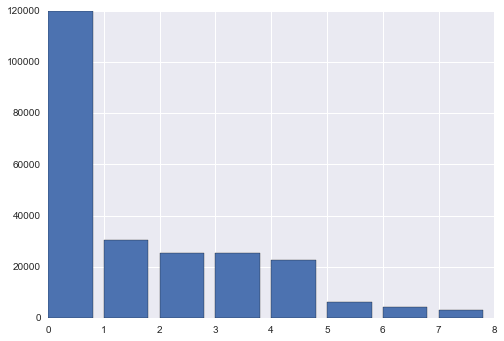

In [19]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show
print(counts)

In [20]:
tweets['candidate'].value_counts()

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64

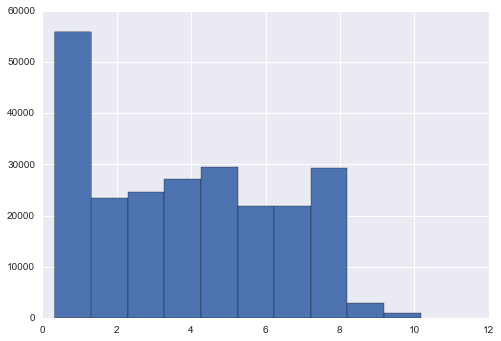

In [21]:
from datetime import datetime
tweets['created'] = pd.to_datetime(tweets['created'])
tweets['user_created'] = pd.to_datetime(tweets['user_created'])

tweets['user_age'] = tweets['user_created'].apply(lambda x: (datetime.now() - x).total_seconds()/3600/24/365)
#tweets.head()
plt.hist(tweets['user_age'])
plt.show()

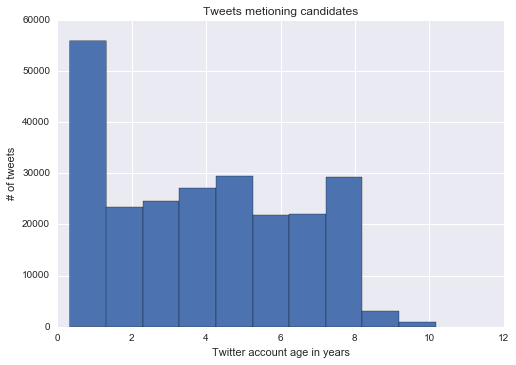

In [22]:
plt.hist(tweets['user_age'])
plt.title("Tweets metioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

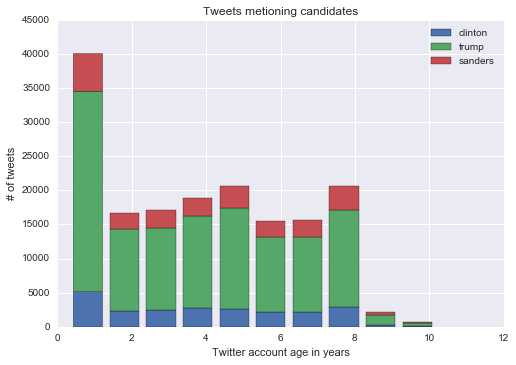

In [23]:
cl_tweets = tweets['user_age'][tweets['candidate'] == 'clinton']
tr_tweets = tweets['user_age'][tweets['candidate'] == 'trump']
sd_tweets = tweets['user_age'][tweets['candidate'] == 'sanders']

plt.hist(
    [cl_tweets, tr_tweets, sd_tweets],
    stacked = True,
    label = ['clinton', 'trump', 'sanders']
)
plt.legend()
plt.title("Tweets metioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

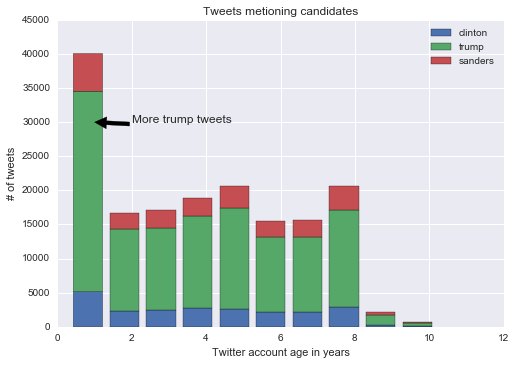

In [24]:
plt.hist(
    [cl_tweets, tr_tweets, sd_tweets],
    stacked = True,
    label = ['clinton', 'trump', 'sanders']
)
plt.legend()
plt.title("Tweets metioning candidates")
plt.xlabel("Twitter account age in years")
plt.annotate('More trump tweets', xy = (1,30000), xytext = (2,30000),
            arrowprops=dict(facecolor='black'))
plt.ylabel("# of tweets")
plt.show()

In [93]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

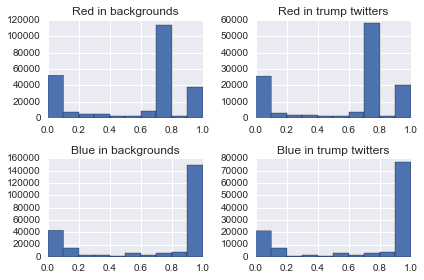

In [96]:
# need to fix
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title("Red in backgrounds")

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title("Red in trump twitters")

ax2.hist(tweets["blue"])
ax2.set_title("Blue in backgrounds")

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title("Blue in trump twitters")

plt.tight_layout()
plt.show()

In [26]:
tweets["user_bg_color"].value_counts()[:10]

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
Name: user_bg_color, dtype: int64

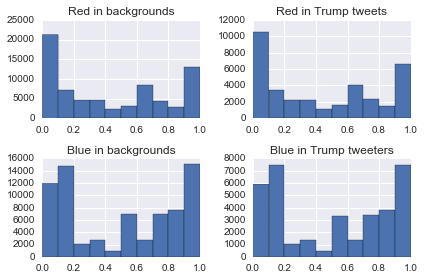

In [97]:
# need to fix
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

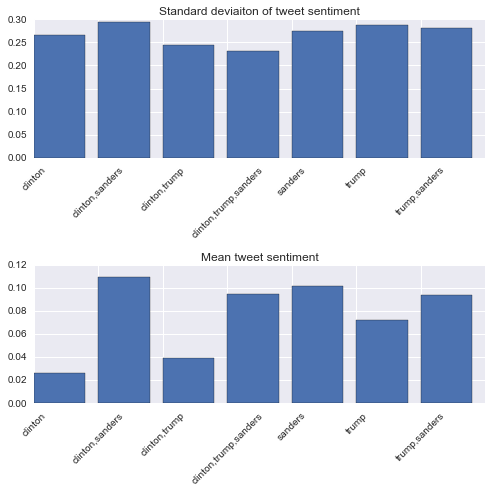

In [28]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows = 2, ncols =1, figsize=(7,7))
ax0,ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation = 45)
ax0.set_title('Standard deviaiton of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

In [29]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

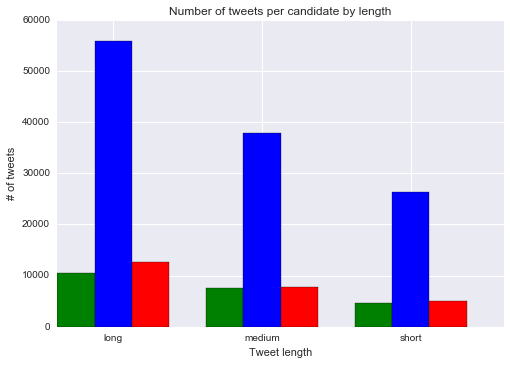

In [30]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6 ,2))
ax.bar(x, tl['clinton'], width, color = 'g')
ax.bar(x + width, tl['trump'], width, color = 'b')
ax.bar(x + (width * 2), tl['sanders'], width, color = 'r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

In [31]:
# as we see from the value counts of the value, the locations of user are in very different forms
# we could look for keywords on each states, for example if it is California, we will just look for things like CA,
# cali, or names of any cities in Californa, and then reform them back to CA
tweets['user_location'].value_counts()

United States                     5661
USA                               3081
California, USA                   1475
Florida, USA                      1412
Washington, DC                    1402
Texas, USA                        1206
Texas                             1145
Los Angeles, CA                   1089
New York, NY                      1059
New York, USA                      985
Florida                            728
California                         675
New York                           667
New Jersey, USA                    660
Los Angeles                        633
NYC                                629
Tennessee, USA                     545
Pennsylvania, USA                  525
Chicago, IL                        522
Houston, TX                        494
North Carolina, USA                491
San Diego, CA                      461
Georgia, USA                       457
Seattle, WA                        449
San Francisco, CA                  439
Colorado                 

### written qustions

<img src="Lab2/question1.jpg">

<img src="Lab2/question1.jpg">